# wine데이터 군집 모델

## 1. 문제 정의 및 데이터 분할

### 라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['name']=wine.target

In [3]:
wine_df.tail()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,name
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840.0,2
177,14.13,4.10,2.74,24.5,96.0,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560.0,2


In [4]:
x = wine_df.iloc[:, :13]

x

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


## 2. 학습 - KMeans

In [5]:
kmeans_3 = KMeans(n_clusters=3, random_state=42)
y_preds = kmeans_3.fit_predict(x)

wine_df['y_preds(3 Group)'] = y_preds
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,name,y_preds(3 Group)
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,2


In [6]:
wine_df.groupby(['name', 'y_preds(3 Group)'])['alcohol'].count()

name  y_preds(3 Group)
0     1                   46
      2                   13
1     0                   50
      1                    1
      2                   20
2     0                   19
      2                   29
Name: alcohol, dtype: int64

In [7]:
kmeans_2 = KMeans(n_clusters=2, random_state=42)
y_preds = kmeans_2.fit_predict(x)

wine_df['y_preds(2 Group)'] = y_preds
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,name,y_preds(3 Group),y_preds(2 Group)
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,2,0


In [8]:
wine_df.groupby(['name', 'y_preds(2 Group)'])['alcohol'].count()

name  y_preds(2 Group)
0     0                    9
      1                   50
1     0                   67
      1                    4
2     0                   47
      1                    1
Name: alcohol, dtype: int64

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3차원에 시각화
def plot3D(x, y, z, category, title) :
    axes3d = Axes3D(plt.figure(figsize=(8, 6))) 
    axes3d.scatter(xs = x, ys = y, zs = z, c = category)
    axes3d.set_title(title)

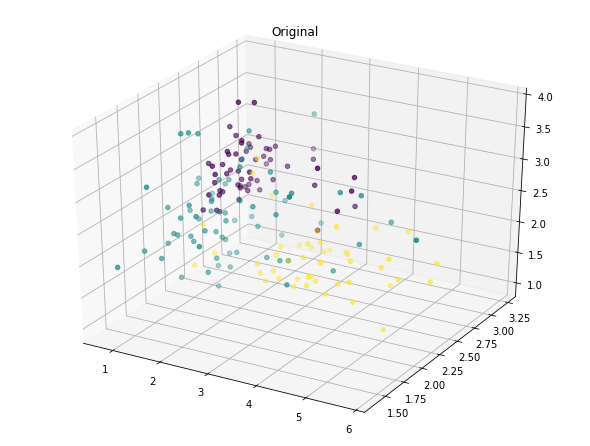

In [11]:
cols = wine_df.columns

# 3차원 이므로 독립변수 중 3개 선정 필요
plot3D(wine_df[cols[1]], wine_df[cols[2]], wine_df[cols[5]], wine_df['name'], 'Original')

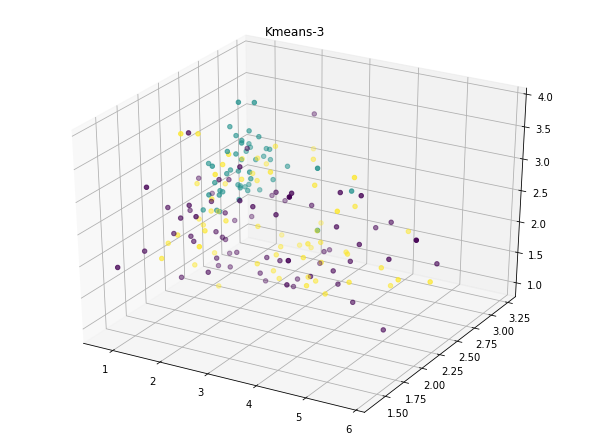

In [13]:
# K-Means 적용 시각화 
plot3D(wine_df[cols[1]], wine_df[cols[2]], wine_df[cols[5]], wine_df['y_preds(3 Group)'], 'Kmeans-3')

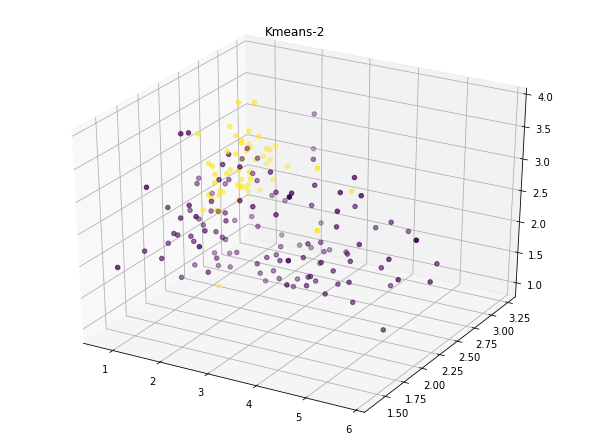

In [15]:
# 군집수 2개인 K-Means 적용 시각화 
plot3D(wine_df[cols[1]], wine_df[cols[2]], wine_df[cols[5]], wine_df['y_preds(2 Group)'], 'Kmeans-2')

## 3. 평가-실루엣 점수

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score

# silhouette_score : 모든 샘플에 대한 평균 실루엣 점수
print('실루엣 점수: {0:.4f}'.format(silhouette_score(x, y_preds))) 

실루엣 점수: 0.6569


In [18]:
wine_df['silhouette'] = silhouette_samples(x, y_preds)
wine_df.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,name,y_preds(3 Group),y_preds(2 Group),silhouette
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0,1,1,0.671083
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0,1,1,0.658740
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0,1,1,0.732458
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0,1,1,0.620472
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0,2,0,0.544379
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0,1,1,0.635878
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0,0,1,1,0.722118
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0,1,1,0.718441
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,0,1,1,0.651838
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0,0,1,1,0.652070


In [19]:
# 클러스터 별 평균 실루엣점수 ( 점수가 높을수록 군집의 응집도가 좋음 )
wine_df.groupby('y_preds(3 Group)')['silhouette'].mean()

y_preds(3 Group)
0    0.770194
1    0.667123
2    0.522933
Name: silhouette, dtype: float64

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score

def plotSilhouette(n_clusters, y_preds):   
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 6)
    y_lower = 10
    silhouette_avg = silhouette_score(x, y_preds)   
    sample_silhouette_values = silhouette_samples(x, y_preds)
    print("군집개수: {0}개, 평균 실루엣 점수: {1:.4f}".format(k, silhouette_avg))

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[y_preds == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  

    ax1.set_title("The silhouette plot for the {0} clusters.".format(n_clusters))
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

## 4. 최적의 군집 수 찾기

군집개수: 2개, 평균 실루엣 점수: 0.6569


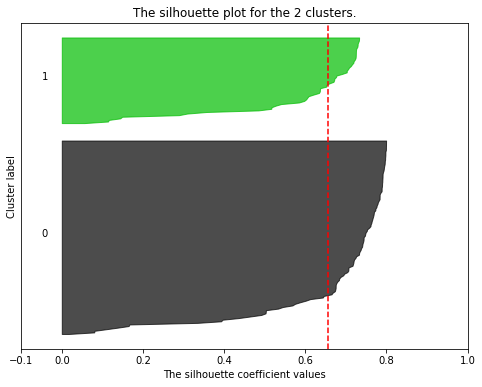

군집개수: 3개, 평균 실루엣 점수: 0.5711


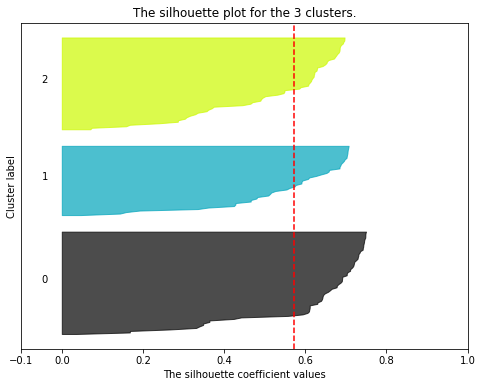

군집개수: 4개, 평균 실루엣 점수: 0.5572


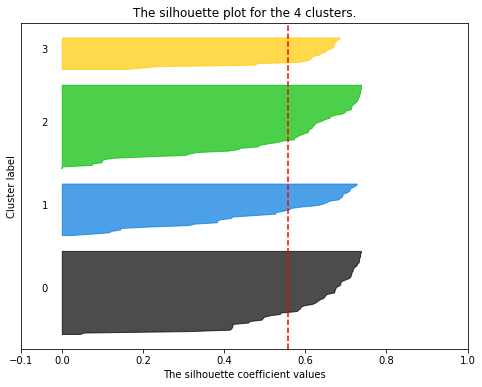

군집개수: 5개, 평균 실루엣 점수: 0.5490


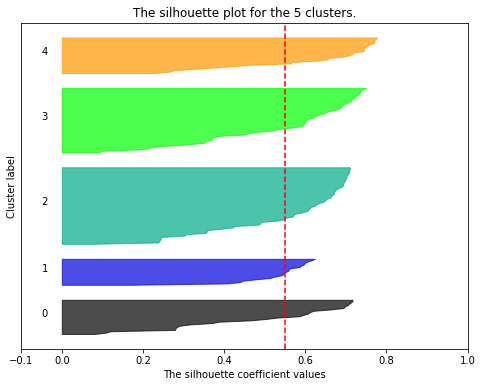

군집개수: 6개, 평균 실루엣 점수: 0.5656


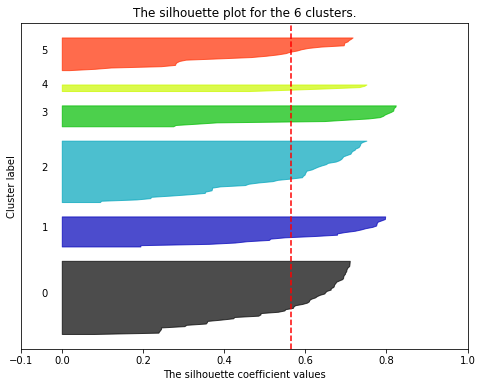

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

k_list = [2, 3, 4, 5, 6]
x = wine.data

for k in k_list:
    model = KMeans(n_clusters= k, random_state=42)
    y_preds = model.fit_predict(x)
    plotSilhouette(k, y_preds)